In [1]:
#importing dependencies needed for pandas and pathlibrary
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#setting a variable for the path
csv = Path("Resources/cleaned_netflix_df.csv")

#reading the path

cleaned_netflix_df = pd.read_csv(csv)

#present the cleaned data
cleaned_netflix_df

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
0,0,Movie,United States,"September 25, 2021",2020,PG-13,Documentaries
1,1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,4,TV Show,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
3,7,Movie,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
4,8,TV Show,United Kingdom,"September 24, 2021",2021,TV-14,"British TV Shows, Reality TV"
...,...,...,...,...,...,...,...
7959,8801,Movie,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,"Dramas, International Movies, Thrillers"
7960,8802,Movie,United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers"
7961,8804,Movie,United States,"November 1, 2019",2009,R,"Comedies, Horror Movies"
7962,8805,Movie,United States,"January 11, 2020",2006,PG,"Children & Family Movies, Comedies"


In [3]:
#finding the value counts of each country
count_country=cleaned_netflix_df['country'].value_counts()
display(count_country)

country
United States                             2812
India                                      972
United Kingdom                             418
Japan                                      243
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [17]:
# Remove leading/trailing spaces from the 'country' column
cleaned_netflix_df['country'] = cleaned_netflix_df['country'].str.strip()

#splitting each row where mulitple countries are in one value into multiple rows
cleaned_netflix_df = cleaned_netflix_df.assign(country=cleaned_netflix_df['country'].str.split(',')).explode('country')
cleaned_netflix_df

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
0,0,Movie,United States,"September 25, 2021",2020,PG-13,Documentaries
1,1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,4,TV Show,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
3,7,Movie,United States,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
3,7,Movie,Ghana,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...
7959,8801,Movie,Jordan,"March 9, 2016",2015,TV-MA,"Dramas, International Movies, Thrillers"
7960,8802,Movie,United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers"
7961,8804,Movie,United States,"November 1, 2019",2009,R,"Comedies, Horror Movies"
7962,8805,Movie,United States,"January 11, 2020",2006,PG,"Children & Family Movies, Comedies"


In [18]:
#calculating the new country count
new_country_count = cleaned_netflix_df['country'].value_counts()
display(new_country_count)

country
United States     3684
India             1046
United Kingdom     805
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: count, Length: 123, dtype: int64

In [19]:
#finding the top 10 country count
top_10_country_count = new_country_count.head(10)
top_10_country_count

country
United States     3684
India             1046
United Kingdom     805
Canada             445
France             393
Japan              316
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

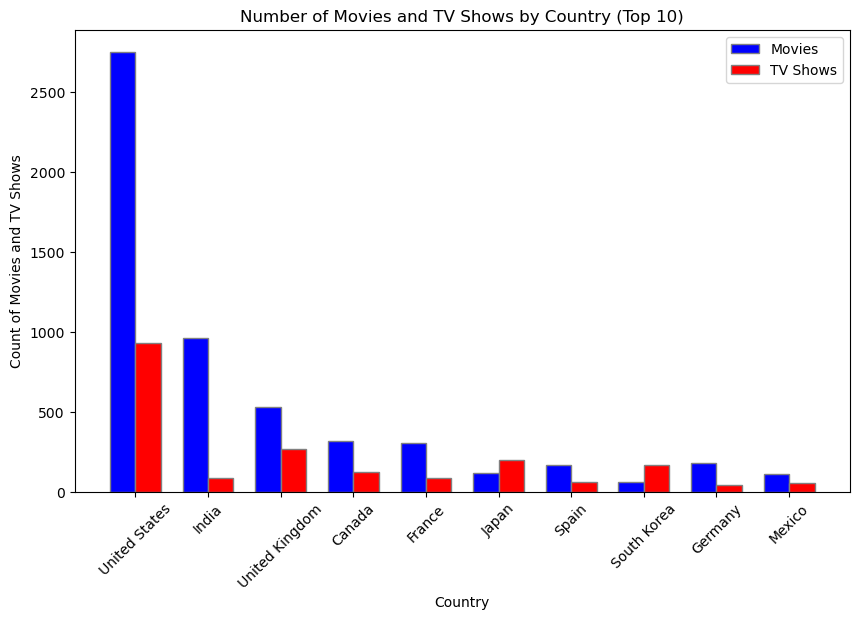

In [20]:
# Grouped the data by Country and Type, then count occurrences
grouped_data = cleaned_netflix_df.groupby(['country', 'type']).size().unstack(fill_value=0)

# Sum the counts of movies and TV shows for each country
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the grouped_data DataFrame by the total count in descending order
sorted_data = grouped_data.sort_values(by='Total', ascending=False)

# Select the top 10 countries
top_10_countries = sorted_data.head(10)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.35

# Set the position of the bars on the x-axis
movies = range(len(top_10_countries.index))
tv_shows = [x + bar_width for x in movies]

# Plot bars for movies
ax.bar(movies, top_10_countries['Movie'], color='b', width=bar_width, edgecolor='grey', label='Movies')
# Plot bars for TV shows
ax.bar(tv_shows, top_10_countries['TV Show'], color='r', width=bar_width, edgecolor='grey', label='TV Shows')

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Count of Movies and TV Shows')
ax.set_xticks([bar + bar_width/2 for bar in range(len(top_10_countries.index))])
ax.set_xticklabels(top_10_countries.index)
ax.legend()

# Show plot
plt.title('Number of Movies and TV Shows by Country (Top 10)')
plt.xticks(rotation=45)
plt.show()


In [21]:
#finding the unique ratings 
ratings_type = cleaned_netflix_df['rating'].unique()
ratings_type

array(['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'PG', 'R', 'TV-PG', 'TV-Y',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [22]:
#removing the values in the ratings column that are not ratings
ratings_cleaned_df = cleaned_netflix_df.loc[(cleaned_netflix_df['rating']!= '74 min') &
                                           (cleaned_netflix_df['rating']!= '84 min')&
                                           (cleaned_netflix_df['rating']!='66 min')]
ratings_cleaned_df

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
0,0,Movie,United States,"September 25, 2021",2020,PG-13,Documentaries
1,1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,4,TV Show,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
3,7,Movie,United States,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
3,7,Movie,Ghana,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...
7959,8801,Movie,Jordan,"March 9, 2016",2015,TV-MA,"Dramas, International Movies, Thrillers"
7960,8802,Movie,United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers"
7961,8804,Movie,United States,"November 1, 2019",2009,R,"Comedies, Horror Movies"
7962,8805,Movie,United States,"January 11, 2020",2006,PG,"Children & Family Movies, Comedies"


In [23]:
#checking the ratings in the dataframe after removing the duration
cleaned_ratings_type = ratings_cleaned_df['rating'].unique()
cleaned_ratings_type

array(['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'PG', 'R', 'TV-PG', 'TV-Y',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [24]:
#removing 'UR' and 'NR' values from the dataframe because it means the film was not rated for some reason
# UR and NR is removed for analysis because it does not help with analyzing the average age for movies or TV shows
remove_unrated_df = ratings_cleaned_df.loc[(ratings_cleaned_df['rating']!='UR')&
                                          (ratings_cleaned_df['rating']!='NR')]
remove_unrated_df

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
0,0,Movie,United States,"September 25, 2021",2020,PG-13,Documentaries
1,1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,4,TV Show,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
3,7,Movie,United States,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
3,7,Movie,Ghana,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...
7959,8801,Movie,Jordan,"March 9, 2016",2015,TV-MA,"Dramas, International Movies, Thrillers"
7960,8802,Movie,United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers"
7961,8804,Movie,United States,"November 1, 2019",2009,R,"Comedies, Horror Movies"
7962,8805,Movie,United States,"January 11, 2020",2006,PG,"Children & Family Movies, Comedies"


In [25]:
#checking values to see if the dataframe if removed the unrated films 
values_without_unrated = remove_unrated_df['rating'].unique()
values_without_unrated

array(['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'PG', 'R', 'TV-PG', 'TV-Y',
       'TV-G', 'G', 'NC-17', 'TV-Y7-FV'], dtype=object)

In [26]:
#creating the movie dataframe
movies_df = remove_unrated_df.loc[remove_unrated_df['type']=='Movie']
movies_df

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
0,0,Movie,United States,"September 25, 2021",2020,PG-13,Documentaries
3,7,Movie,United States,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
3,7,Movie,Ghana,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
3,7,Movie,Burkina Faso,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
3,7,Movie,United Kingdom,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...
7959,8801,Movie,Jordan,"March 9, 2016",2015,TV-MA,"Dramas, International Movies, Thrillers"
7960,8802,Movie,United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers"
7961,8804,Movie,United States,"November 1, 2019",2009,R,"Comedies, Horror Movies"
7962,8805,Movie,United States,"January 11, 2020",2006,PG,"Children & Family Movies, Comedies"


In [27]:
#checking the unique ratings
movie_types = movies_df['rating'].unique()
movie_types

array(['PG-13', 'TV-MA', 'TV-14', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'TV-Y7-FV'], dtype=object)

In [32]:
#removing TV ratings from movies type
movies_df = movies_df.loc[(movies_df['rating']!='TV-MA')&
                         (movies_df['rating']!='TV-14')&
                         (movies_df['rating']!='TV-PG')&
                         (movies_df['rating']!='TV-Y7')&
                         (movies_df['rating']!='TV-G')&
                         (movies_df['rating']!='TV-Y')&
                         (movies_df['rating']!='TV-Y7-FV')]
movies_df

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
0,0,Movie,United States,"September 25, 2021",2020,PG-13,Documentaries
5,9,Movie,United States,"September 24, 2021",2021,PG-13,"Comedies, Dramas"
12,27,Movie,United States,"September 20, 2021",2010,PG-13,Comedies
13,28,Movie,United States,"September 19, 2021",2013,PG-13,"Horror Movies, Sci-Fi & Fantasy"
14,29,Movie,United States,"September 19, 2021",2013,PG-13,Thrillers
...,...,...,...,...,...,...,...
7949,8791,Movie,United States,"November 20, 2019",2011,R,"Comedies, Dramas, Independent Movies"
7951,8793,Movie,United States,"November 20, 2019",2005,PG,"Children & Family Movies, Comedies"
7960,8802,Movie,United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers"
7961,8804,Movie,United States,"November 1, 2019",2009,R,"Comedies, Horror Movies"


In [33]:
#verifying that the movie dataframe only contains movie ratings
new_movies_type = movies_df['rating'].unique()
new_movies_type

array(['PG-13', 'PG', 'R', 'G', 'NC-17'], dtype=object)

In [28]:
#createing the dataframe for the TV show
tv_shows_df = remove_unrated_df.loc[remove_unrated_df['type']=='TV Show']
tv_shows_df

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
1,1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,4,TV Show,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
4,8,TV Show,United Kingdom,"September 24, 2021",2021,TV-14,"British TV Shows, Reality TV"
7,15,TV Show,United States,"September 22, 2021",2021,TV-MA,"TV Comedies, TV Dramas"
8,17,TV Show,Mexico,"September 22, 2021",2020,TV-MA,"Crime TV Shows, Spanish-Language TV Shows, TV ..."
...,...,...,...,...,...,...,...
7955,8797,TV Show,United States,"September 13, 2018",2016,TV-Y7,Kids' TV
7955,8797,TV Show,France,"September 13, 2018",2016,TV-Y7,Kids' TV
7955,8797,TV Show,South Korea,"September 13, 2018",2016,TV-Y7,Kids' TV
7955,8797,TV Show,Indonesia,"September 13, 2018",2016,TV-Y7,Kids' TV


In [29]:
#checking the unique tv ratings
tv_show_types = tv_shows_df['rating'].unique()
tv_show_types

array(['TV-MA', 'TV-14', 'TV-Y7', 'TV-PG', 'TV-Y', 'TV-G', 'R',
       'TV-Y7-FV'], dtype=object)

In [34]:
#removing movie ratings from tv-shows
tv_shows_df= tv_shows_df.loc[(tv_shows_df['rating']!='R')]
tv_shows_df

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
1,1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,4,TV Show,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
4,8,TV Show,United Kingdom,"September 24, 2021",2021,TV-14,"British TV Shows, Reality TV"
7,15,TV Show,United States,"September 22, 2021",2021,TV-MA,"TV Comedies, TV Dramas"
8,17,TV Show,Mexico,"September 22, 2021",2020,TV-MA,"Crime TV Shows, Spanish-Language TV Shows, TV ..."
...,...,...,...,...,...,...,...
7955,8797,TV Show,United States,"September 13, 2018",2016,TV-Y7,Kids' TV
7955,8797,TV Show,France,"September 13, 2018",2016,TV-Y7,Kids' TV
7955,8797,TV Show,South Korea,"September 13, 2018",2016,TV-Y7,Kids' TV
7955,8797,TV Show,Indonesia,"September 13, 2018",2016,TV-Y7,Kids' TV


In [35]:
#verifying that tv show dataframe only has tv ratings
new_tv_shows_types=tv_shows_df['rating'].unique()
new_tv_shows_types

array(['TV-MA', 'TV-14', 'TV-Y7', 'TV-PG', 'TV-Y', 'TV-G', 'TV-Y7-FV'],
      dtype=object)

#tv show ratings url: https://www.thetvboss.org/tv-ratings/
#movie ratings url: https://www.thegrandtheatre.com/mpaa-ratings

In [40]:
#importing the datetime dependency
from datetime import datetime
#finding the current date time
current_year = datetime.now().year
#adding new column for age for all tv shows based of release year and current year
tv_shows_df.loc[:,'age']= current_year - tv_shows_df['release_year']

tv_shows_df

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in,age
1,1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",3
2,4,TV Show,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",3
4,8,TV Show,United Kingdom,"September 24, 2021",2021,TV-14,"British TV Shows, Reality TV",3
7,15,TV Show,United States,"September 22, 2021",2021,TV-MA,"TV Comedies, TV Dramas",3
8,17,TV Show,Mexico,"September 22, 2021",2020,TV-MA,"Crime TV Shows, Spanish-Language TV Shows, TV ...",4
...,...,...,...,...,...,...,...,...
7955,8797,TV Show,United States,"September 13, 2018",2016,TV-Y7,Kids' TV,8
7955,8797,TV Show,France,"September 13, 2018",2016,TV-Y7,Kids' TV,8
7955,8797,TV Show,South Korea,"September 13, 2018",2016,TV-Y7,Kids' TV,8
7955,8797,TV Show,Indonesia,"September 13, 2018",2016,TV-Y7,Kids' TV,8


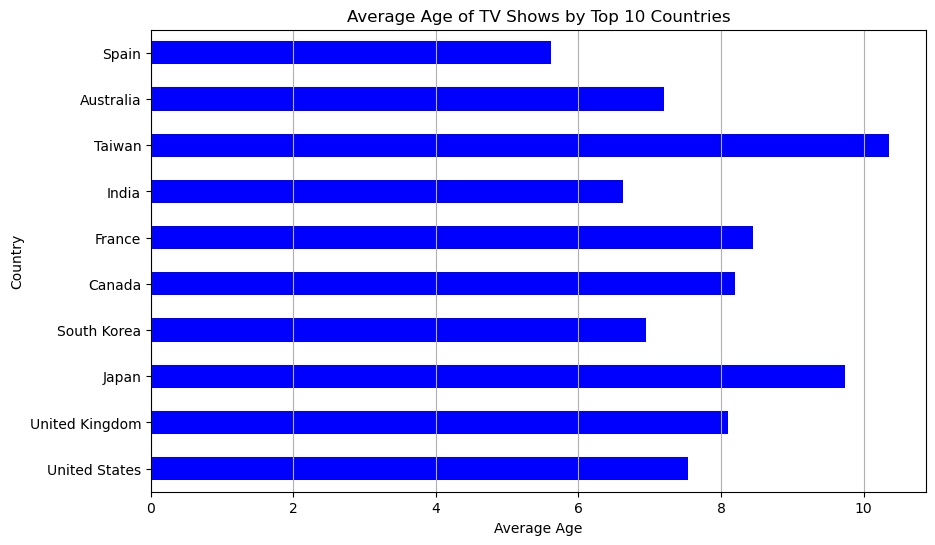

In [43]:
# Calculate count of TV shows for each country
country_counts = tv_shows_df['country'].value_counts()

# Select top 10 countries by count
top_10_countries = country_counts.head(10).index

# Calculate average age of TV shows for each of the top 10 countries
average_age_by_country = tv_shows_df.groupby('country')['age'].mean().loc[top_10_countries]

# Plot the horizontal broken bar graph
plt.figure(figsize=(10, 6))
average_age_by_country.plot(kind='barh', color='blue')
plt.xlabel('Average Age')
plt.ylabel('Country')
plt.title('Average Age of TV Shows by Top 10 Countries')
plt.grid(axis='x')
plt.show()

In [44]:
#creating a variable for the current year
current_year = datetime.now().year
#calculating the age of each movie
movies_df.loc[:,'age']= current_year - movies_df['release_year']

movies_df

/var/folders/__/0m3rrn_x3ll5gbmr68s7dglw0000gn/T/ipykernel_88159/1850112339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.loc[:,'age']= current_year - movies_df['release_year']


,Unnamed: 0,type,country,date_added,release_year,rating,listed_in,age
0,0,Movie,United States,"September 25, 2021",2020,PG-13,Documentaries,4
5,9,Movie,United States,"September 24, 2021",2021,PG-13,"Comedies, Dramas",3
12,27,Movie,United States,"September 20, 2021",2010,PG-13,Comedies,14
13,28,Movie,United States,"September 19, 2021",2013,PG-13,"Horror Movies, Sci-Fi & Fantasy",11
14,29,Movie,United States,"September 19, 2021",2013,PG-13,Thrillers,11
...,...,...,...,...,...,...,...,...
7949,8791,Movie,United States,"November 20, 2019",2011,R,"Comedies, Dramas, Independent Movies",13
7951,8793,Movie,United States,"November 20, 2019",2005,PG,"Children & Family Movies, Comedies",19
7960,8802,Movie,United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers",17
7961,8804,Movie,United States,"November 1, 2019",2009,R,"Comedies, Horror Movies",15


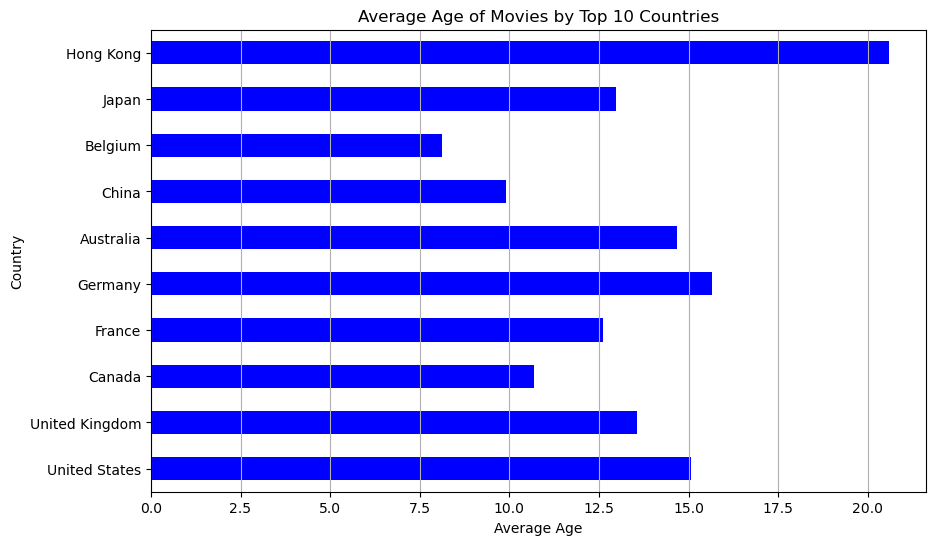

In [45]:
# Calculate count of movies for each country
country_counts = movies_df['country'].value_counts()

# Select top 10 countries by count
top_10_countries = country_counts.head(10).index

# Calculate average age of movies for each of the top 10 countries
average_age_by_country = movies_df.groupby('country')['age'].mean().loc[top_10_countries]

# Plot the horizontal broken bar graph
plt.figure(figsize=(10, 6))
average_age_by_country.plot(kind='barh', color='blue')
plt.xlabel('Average Age')
plt.ylabel('Country')
plt.title('Average Age of Movies by Top 10 Countries')
plt.grid(axis='x')
plt.show()